In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
plt.style.use('ggplot')

In [141]:
# combine train and test set.
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
full=pd.concat([train,test],ignore_index=True)

In [142]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [143]:
full.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


__The 'Age', 'Cabin', 'Embarked', 'Fare' columns have missing values. First we fill the missing 'Embarked' with the mode.__

In [144]:
full.Embarked.mode()

,Embarked
0,S


In [145]:
full['Embarked'].fillna('S',inplace=True)

__Since 'Fare' is mainly related to 'Pclass', we should check which class this person belongs to.__

In [146]:
full[full.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


__It's a passenger from Pclass 3, so we'll fill the missing value with the median fare of Pclass 3.__

In [147]:
full.Fare.fillna(full[full.Pclass==3]['Fare'].median(),inplace=True)

**There are a lot of missing values in 'Cabin', maybe there is difference between the survival rate of people who has Cabin number and those who hasn't.**

In [148]:
full.loc[full.Cabin.notnull(),'Cabin']=1
full.loc[full.Cabin.isnull(),'Cabin']=0

In [149]:
full.Cabin.isnull().sum()

0

Text(0.5, 1.0, 'Survival Rate')

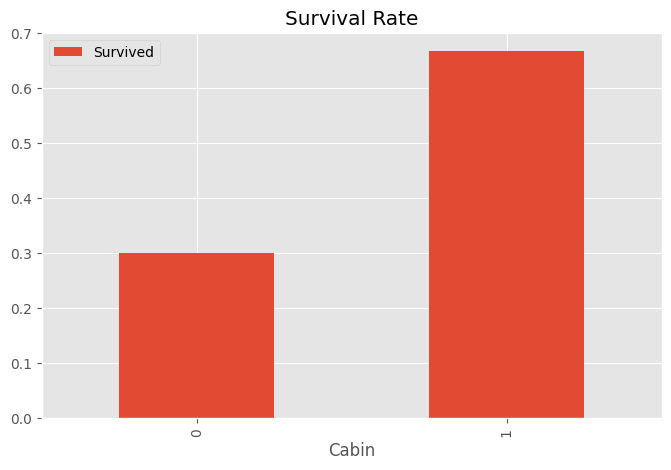

In [150]:
pd.pivot_table(full,index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

__We can also plot the count of 'Cabin' to see some patterns.__

In [151]:
cabin=pd.crosstab(full.Cabin,full.Survived)
cabin.rename(index={0:'no cabin',1:'cabin'},columns={0.0:'Dead',1.0:'Survived'},inplace=True)
cabin

Survived,Dead,Survived
Cabin,,
no cabin,481,206
cabin,68,136


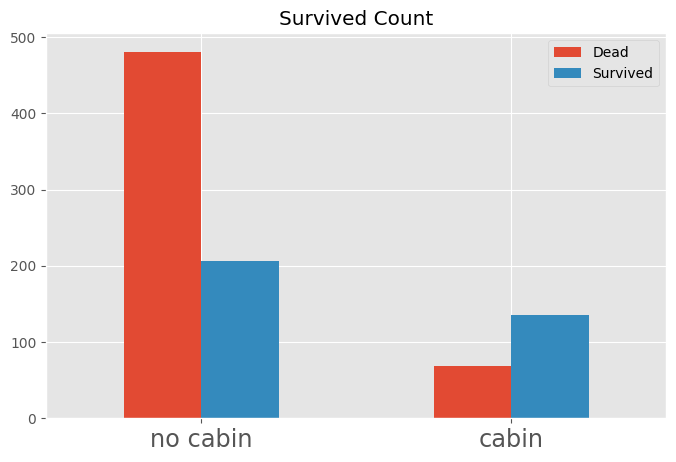

In [152]:
cabin.plot.bar(figsize=(8,5))
plt.xticks(rotation=0,size='xx-large')
plt.title('Survived Count')
plt.xlabel('')
plt.legend()

__From the plot, we can conclude that there is far more chance for a passenger to survive if we know his/her 'Cabin'.__

### Extract Title from 'Name'

In [153]:
full['Title']=full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [154]:
full.Title.value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Major,2


In [155]:
pd.crosstab(full.Title,full.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


__All the 'Title' belongs to one kind of gender except for 'Dr'.__

In [156]:
full[(full.Title=='Dr')&(full.Sex=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,Dr


__So the PassengerId of the female 'Dr' is '797'. Then we map the 'Title'.__

In [157]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

In [158]:
full.Title=full.Title.map(nn)

In [159]:
# assign the female 'Dr' to 'Rarewoman'
full.loc[full.PassengerId==797,'Title']='Rarewoman'

In [160]:
full.Title.value_counts()

,count
Title,
Mr,765
Miss,260
Mrs,197
Master,61
Rareman,17
Rarewoman,9


In [161]:
full[full.Title=='Master']['Sex'].value_counts()

,count
Sex,
male,61


In [162]:
full[full.Title=='Master']['Age'].describe()

,Age
count,53.000000
mean,5.482642
std,4.161554
min,0.330000
25%,2.000000
50%,4.000000
75%,9.000000
max,14.500000


In [163]:
full[full.Title=='Miss']['Age'].describe()

,Age
count,210.000000
mean,21.774238
std,12.249077
min,0.170000
25%,15.000000
50%,22.000000
75%,30.000000
max,63.000000


+ __'Master' mainly stands for little boy, but we also want to find little girl. Because children tend to have higher survival rate.__

+ __For the 'Miss' with a Age record, we can simply determine whether a 'Miss' is a little girl by her age.__

+ __For the 'Miss' with no Age record, we use (Parch!=0). Since if it's a little girl, she was very likely to be accompanied by parents.__

We'll create a function to filter the girls. The function can't be used if 'Age' is Nan, so first we fill the missing values with '999'.

In [164]:
full.Age.fillna(999,inplace=True)

In [165]:
def girl(aa):
    if (aa.Age!=999)&(aa.Title=='Miss')&(aa.Age<=14):
        return 'Girl'
    elif (aa.Age==999)&(aa.Title=='Miss')&(aa.Parch!=0):
        return 'Girl'
    else:
        return aa.Title

In [166]:
full['Title']=full.apply(girl,axis=1)

In [167]:
full.Title.value_counts()

,count
Title,
Mr,765
Miss,201
Mrs,197
Master,61
Girl,59
Rareman,17
Rarewoman,9


__Next we fill the missing 'Age' according to their 'Title'.__

In [168]:
full[full.Age==999]['Age'].value_counts()

,count
Age,
999.0,263


In [169]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.Age==999)&(full.Title==i),'Age']=full.loc[full.Title==i,'Age'].median()

In [170]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


### Finally, there is no missing value now!!!

# Exploratory Visualization

In [171]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


__Let's first check whether the Age of each Title is reasonable.__

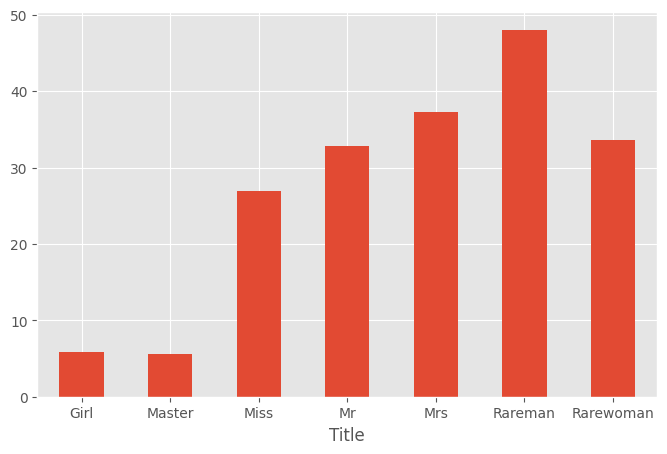

In [172]:
full.groupby(['Title'])['Age'].mean().plot(kind='bar',figsize=(8,5)) # Removed 'Title' from the aggregation
plt.xticks(rotation=0)
plt.show()

__As we can see, female has a much larger survival rate than male.__

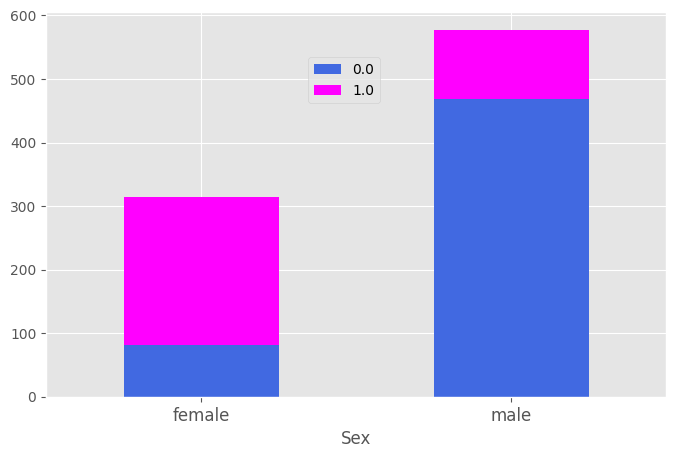

In [173]:
pd.crosstab(full.Sex,full.Survived).plot.bar(stacked=True,figsize=(8,5),color=['#4169E1','#FF00FF'])
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))

__ We can also check the relationship between 'Age' and 'Survived'.__

In [174]:
agehist=pd.concat([full[full.Survived==1]['Age'],full[full.Survived==0]['Age']],axis=1)
agehist.columns=['Survived','Dead']
agehist.head()

,Survived,Dead
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
8,27.0,NaN
9,14.0,NaN


<Axes: ylabel='Frequency'>

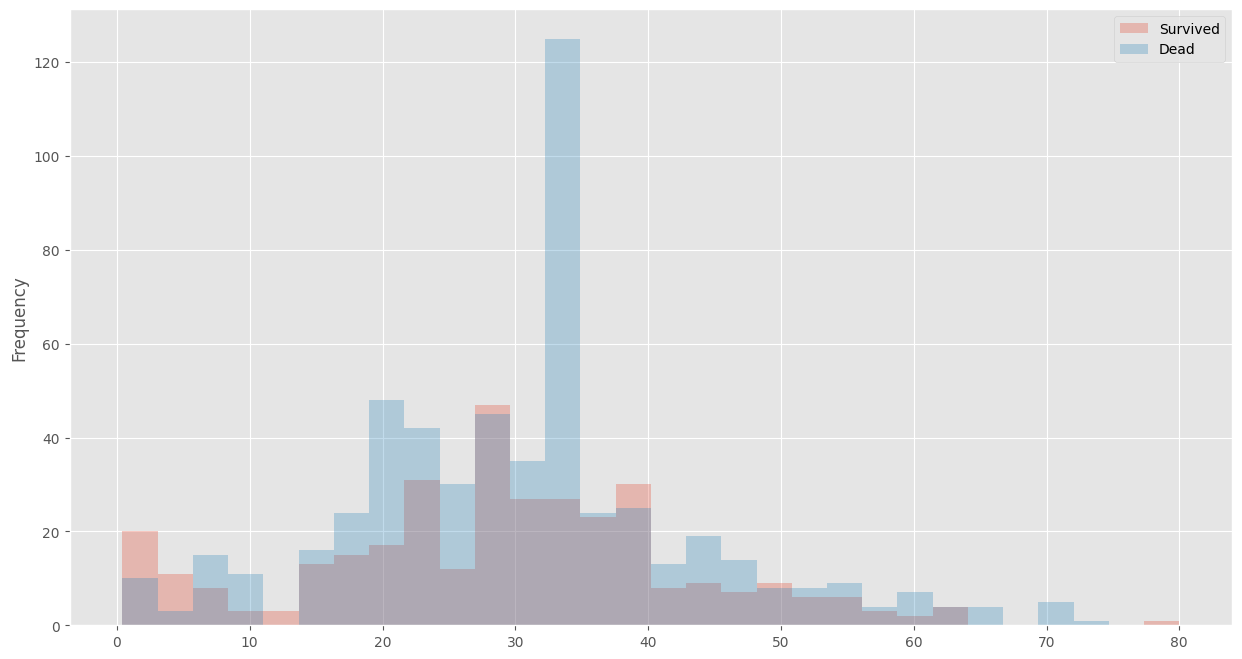

In [175]:
agehist.plot(kind='hist',bins=30,figsize=(15,8),alpha=0.3)

In [176]:
farehist=pd.concat([full[full.Survived==1]['Fare'],full[full.Survived==0]['Fare']],axis=1)
farehist.columns=['Survived','Dead']
farehist.head()

,Survived,Dead
1,71.2833,NaN
2,7.9250,NaN
3,53.1000,NaN
8,11.1333,NaN
9,30.0708,NaN


<Axes: ylabel='Frequency'>

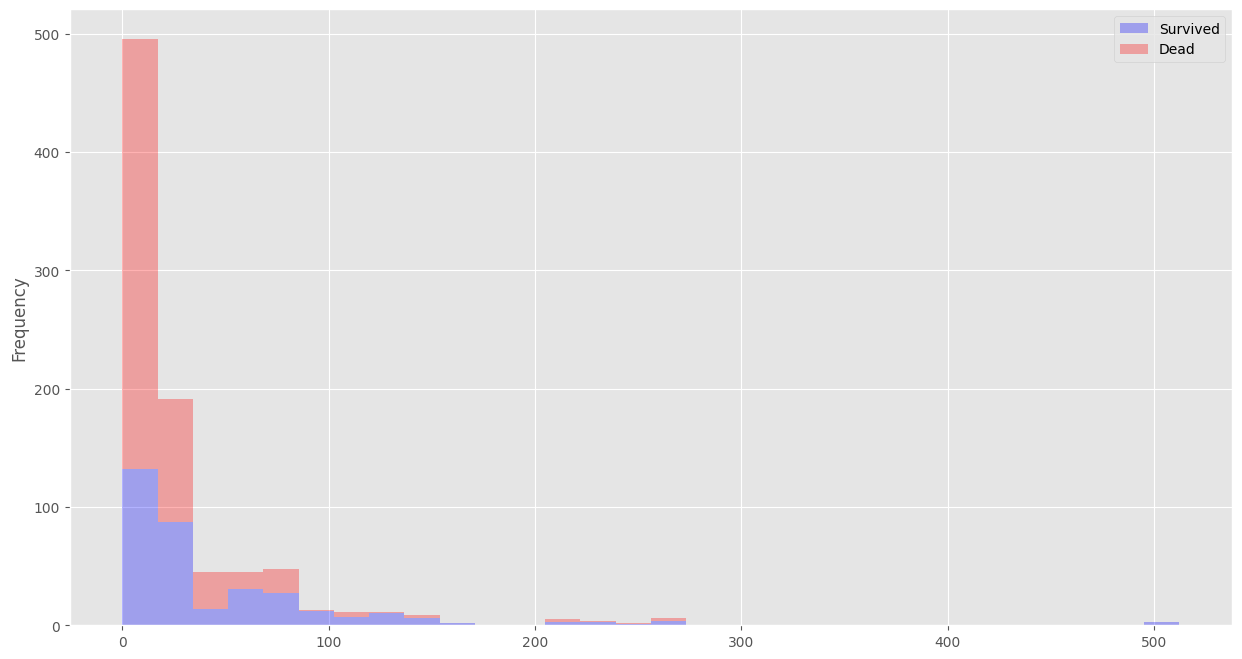

In [177]:
farehist.plot.hist(bins=30,figsize=(15,8),alpha=0.3,stacked=True,color=['blue','red'])

__People with high 'Fare' are more likely to survive, though most 'Fare' are under 100.__

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Girl'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Mr'),
  Text(4, 0, 'Mrs'),
  Text(5, 0, 'Rareman'),
  Text(6, 0, 'Rarewoman')])

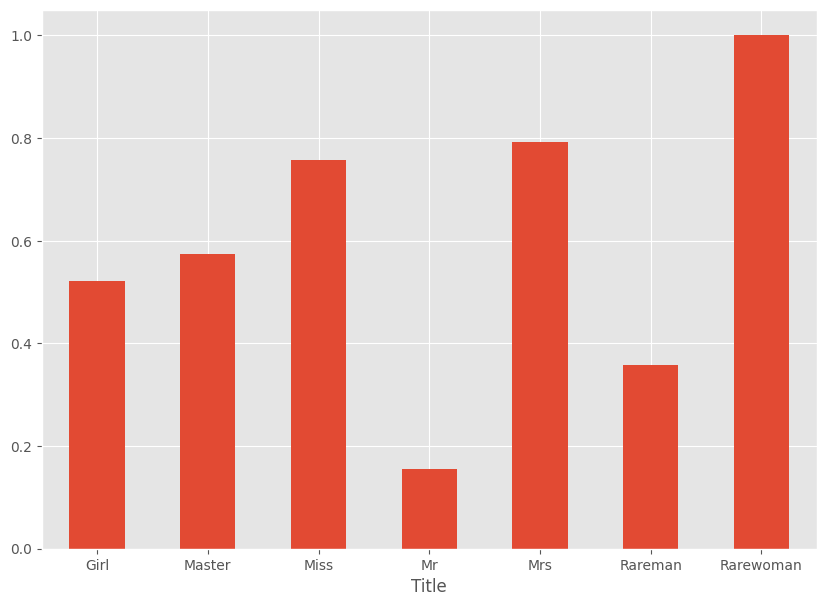

In [178]:
full.groupby(['Title'])['Survived'].mean().plot(kind='bar',figsize=(10,7)) # Removed 'Title' from the list of columns to calculate the mean
plt.xticks(rotation=0)

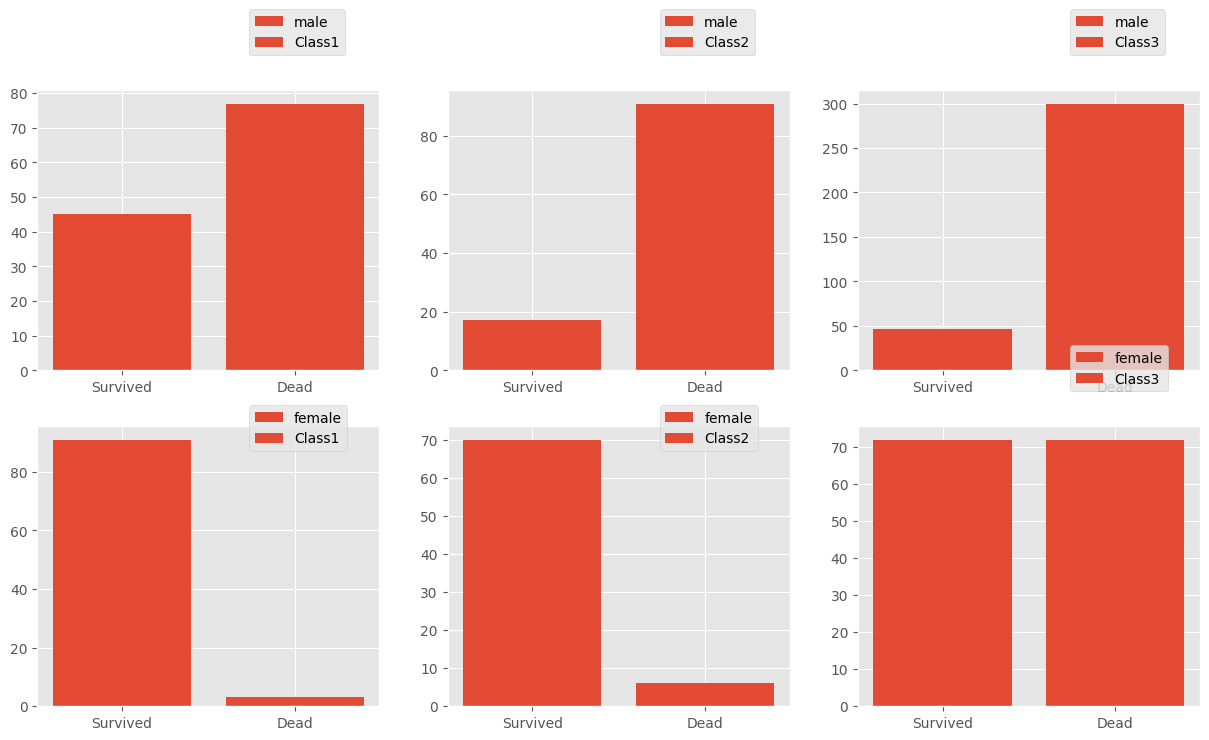

In [179]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
Sex1=['male','female']
for i,ax in zip(Sex1,axes):
    for j,pp in zip(range(1,4),ax):
        PclassSex=full[(full.Sex==i)&(full.Pclass==j)]['Survived'].value_counts().sort_index(ascending=False)
        pp.bar(range(len(PclassSex)),PclassSex,label=(i,'Class'+str(j)))
        pp.set_xticks((0,1))
        pp.set_xticklabels(('Survived','Dead'))
        pp.legend(bbox_to_anchor=(0.6,1.1))

# Feature Engeneering

In [180]:
# create age bands
full.AgeCut=pd.cut(full.Age,5)

<ipython-input-180-d99ed469a3af>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  full.AgeCut=pd.cut(full.Age,5)


In [181]:
# create fare bands
full.FareCut=pd.qcut(full.Fare,5)

<ipython-input-181-e4f24a49c74d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  full.FareCut=pd.qcut(full.Fare,5)


In [182]:
full.AgeCut.value_counts().sort_index()

,count
Age,
"(0.0902, 16.136]",152
"(16.136, 32.102]",564
"(32.102, 48.068]",473
"(48.068, 64.034]",107
"(64.034, 80.0]",13


In [183]:
full.FareCut.value_counts().sort_index()

,count
Fare,
"(-0.001, 7.854]",275
"(7.854, 10.5]",255
"(10.5, 21.558]",255
"(21.558, 41.579]",265
"(41.579, 512.329]",259


In [184]:
# replace agebands with ordinals
full.loc[full.Age<=16.136,'AgeCut']=1
full.loc[(full.Age>16.136)&(full.Age<=32.102),'AgeCut']=2
full.loc[(full.Age>32.102)&(full.Age<=48.068),'AgeCut']=3
full.loc[(full.Age>48.068)&(full.Age<=64.034),'AgeCut']=4
full.loc[full.Age>64.034,'AgeCut']=5

<Axes: xlabel='FareCut'>

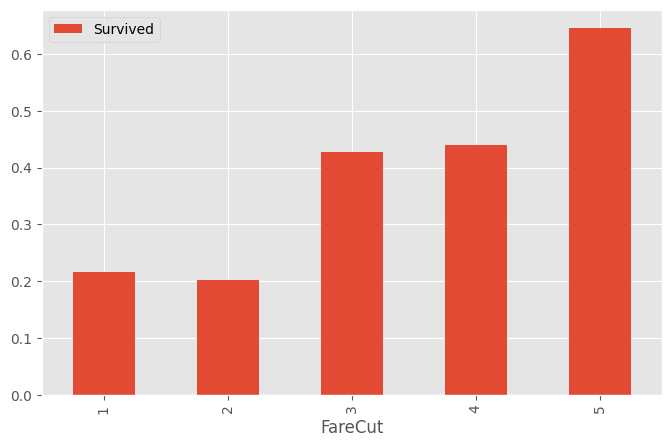

In [185]:
# Ensure the 'FareCut' column exists. If not, create it.
if 'FareCut' not in full.columns:
  full['FareCut'] = 0 # Initialize the column with a default value

full.loc[full.Fare<=7.854,'FareCut']=1
full.loc[(full.Fare>7.854)&(full.Fare<=10.5),'FareCut']=2
full.loc[(full.Fare>10.5)&(full.Fare<=21.558),'FareCut']=3
full.loc[(full.Fare>21.558)&(full.Fare<=41.579),'FareCut']=4
full.loc[full.Fare>41.579,'FareCut']=5

full[['FareCut','Survived']].groupby(['FareCut']).mean().plot.bar(figsize=(8,5))

__We can see from the plot that 'FareCut' has a big impact on survial rate.__

In [186]:
# Select only numerical columns from the DataFrame
numerical_full = full.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
numerical_full.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeCut,FareCut
PassengerId,1.000000,-0.005007,-0.038354,0.026528,-0.055224,0.008942,0.031029,0.017900,-0.003346
Survived,-0.005007,1.000000,-0.338481,-0.077692,-0.035322,0.081629,0.257307,-0.103700,0.318206
Pclass,-0.038354,-0.338481,1.000000,-0.361790,0.060832,0.018322,-0.558740,-0.328087,-0.720881
Age,0.026528,-0.077692,-0.361790,1.000000,-0.259798,-0.161843,0.153051,0.939760,0.129070
SibSp,-0.055224,-0.035322,0.060832,-0.259798,1.000000,0.373587,0.160388,-0.256077,0.351834
Parch,0.008942,0.081629,0.018322,-0.161843,0.373587,1.000000,0.221668,-0.159184,0.337256
Fare,0.031029,0.257307,-0.558740,0.153051,0.160388,0.221668,1.000000,0.135191,0.603698
AgeCut,0.017900,-0.103700,-0.328087,0.939760,-0.256077,-0.159184,0.135191,1.000000,0.091607
FareCut,-0.003346,0.318206,-0.720881,0.129070,0.351834,0.337256,0.603698,0.091607,1.000000


__We haven't gererate any feature from 'Parch','Pclass','SibSp','Title', so let's do this by using pivot table.__

In [187]:
full[full.Survived.notnull()].pivot_table(index=['Title','Pclass'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Pclass          
Rarewoman 2       1.000000
          1       1.000000
Master    1       1.000000
          2       1.000000
Girl      2       1.000000
Miss      1       0.977273
Mrs       1       0.976190
Miss      2       0.920000
Mrs       2       0.902439
Miss      3       0.552239
Mrs       3       0.500000
Girl      1       0.500000
Rareman   1       0.416667
Girl      3       0.400000
Master    3       0.392857
Mr        1       0.345794
          3       0.112853
          2       0.082474
Rareman   2       0.000000

In [188]:
full[full.Survived.notnull()].pivot_table(index=['Title','Parch'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Parch          
Rarewoman 0      1.000000
Master    0      1.000000
Miss      1      0.875000
          2      0.857143
Mrs       0      0.855072
          1      0.812500
          2      0.769231
          3      0.750000
Girl      0      0.750000
Miss      0      0.736842
Girl      1      0.650000
Master    1      0.608696
          2      0.500000
Rareman   0      0.384615
Girl      2      0.363636
Mrs       5      0.250000
Mr        0      0.157447
          1      0.147059
          2      0.133333
          4      0.000000
          5      0.000000
Mrs       4      0.000000
          6      0.000000
Rareman   1      0.000000
Mr        3      0.000000

#### _From the pivot tables above, there is definitely a relationship among 'Survived','Title','Pclass','Parch'. So we can combine them together._

In [189]:
# only choose the object with not null 'Survived'.
TPP=full[full.Survived.notnull()].pivot_table(index=['Title','Pclass','Parch'],values=['Survived']).sort_values('Survived',ascending=False)
TPP

Survived
Title     Pclass Parch          
Rarewoman 2      0      1.000000
Master    3      0      1.000000
Mrs       1      1      1.000000
          2      2      1.000000
                 3      1.000000
Miss      2      2      1.000000
                 1      1.000000
          1      2      1.000000
Mrs       1      0      1.000000
Miss      1      1      1.000000
Girl      2      1      1.000000
Master    2      2      1.000000
                 1      1.000000
          1      2      1.000000
Rarewoman 1      0      1.000000
Girl      2      2      1.000000
Miss      1      0      0.966667
Mrs       2      1      0.909091
Miss      2      0      0.904762
Mrs       2      0      0.869565
Girl      3      0      0.750000
Mrs       3      2      0.666667
                 0      0.611111
Miss      3      0      0.571429
Girl      3      1      0.533333
Mrs       1      2      0.500000
          3      3      0.500000
Girl      1      2      0.500000
Rareman   1      0      0.454545
Mrs       3      1      0.444444
Master    3      1      0.437500
Mr        1      2      0.400000
                 0      0.352273
Miss      3      2      0.333333
Mr        1      1      0.307692
Master    3      2      0.272727
Mrs       3      5      0.250000
Girl      3      2      0.187500
Mr        3      0      0.118644
          2      0      0.091954
          3      1      0.071429
          1      4      0.000000
Miss      3      1      0.000000
Mr        2      2      0.000000
          3      5      0.000000
Mrs       3      4      0.000000
Mr        3      4      0.000000
Mrs       3      6      0.000000
Mr        3      3      0.000000
Rareman   1      1      0.000000
          2      0      0.000000
Mr        3      2      0.000000
          2      1      0.000000

Text(34, 0.54, '50% survival rate')

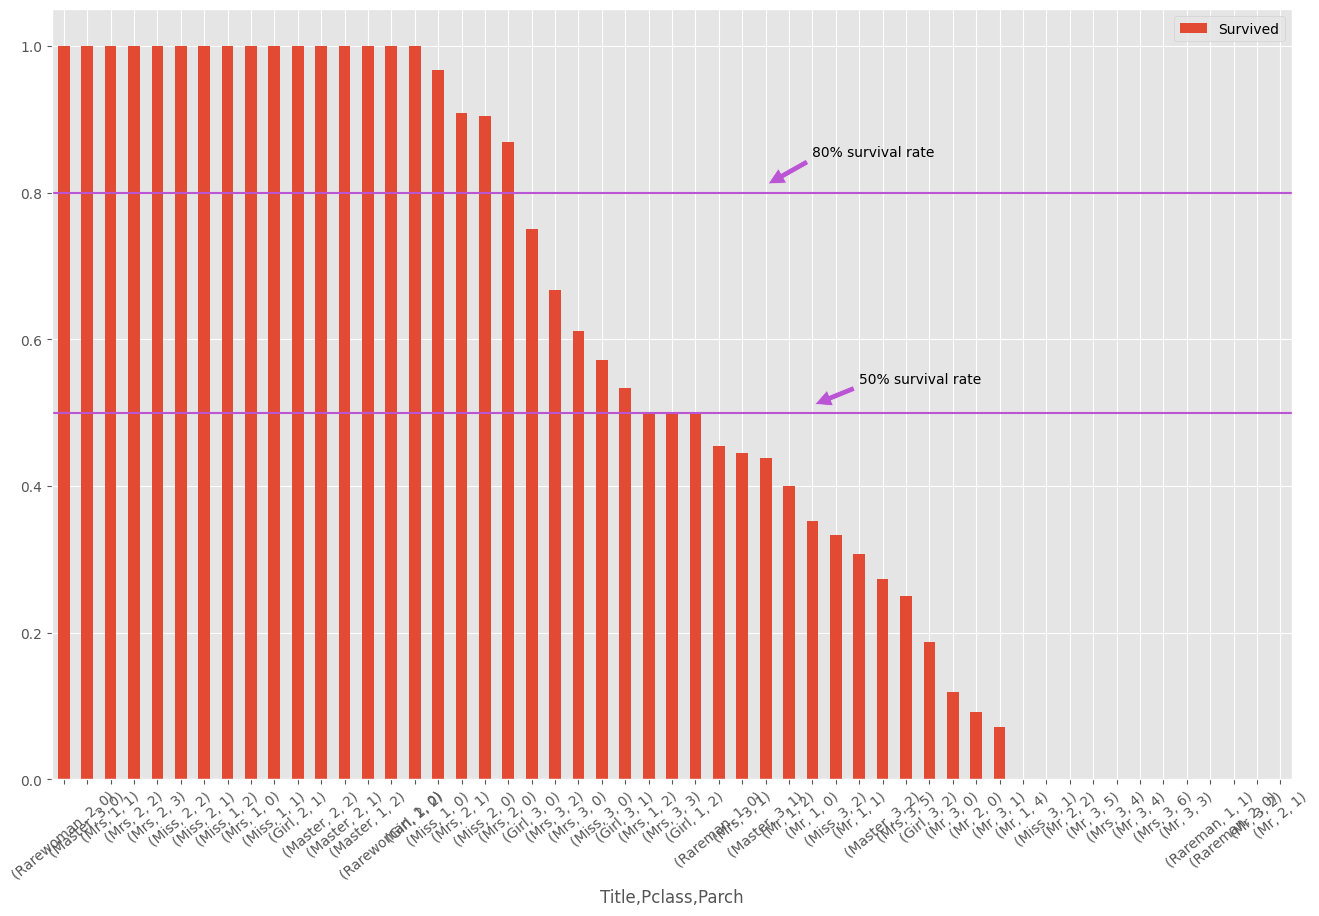

In [190]:
TPP.plot(kind='bar',figsize=(16,10))
plt.xticks(rotation=40)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% survival rate',xy=(30,0.81),xytext=(32,0.85),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(32,0.51),xytext=(34,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

__From the plot, we can draw some horizontal lines and make some classification. I only choose 80% and 50%, because I'm so afraid of overfitting.__

In [191]:
# use 'Title','Pclass','Parch' to generate feature 'TPP'.
Tit=['Girl','Master','Mr','Miss','Mrs','Rareman','Rarewoman']
for i in Tit:
    for j in range(1,4):
        for g in range(0,10):
            if full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.8:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=1
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.5:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=2
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=3
            else:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=4

+ __'TPP=1' means highest probability to survive, and 'TPP=3' means the lowest.__
+ __'TPP=4' means there is no such combination of (Title&Pclass&Pclass) in train set. Let's see what kind of combination it contains.__

In [192]:
full[full.TPP==4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCut,FareCut,TPP
915,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,1,C,Mrs,3.0,5,4.0
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.000,1,S,Mrs,4.0,5,4.0
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,33.0,0,0,364856,7.750,0,Q,Rarewoman,3.0,1,4.0
1011,1012,NaN,2,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.750,0,S,Girl,1.0,3,4.0
1030,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.900,0,S,Mr,3.0,5,4.0
1033,1034,NaN,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,1,C,Mr,4.0,5,4.0
1233,1234,NaN,3,"Sage, Mr. John George",male,34.5,1,9,CA. 2343,69.550,0,S,Mr,3.0,5,4.0
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,39.0,1,9,CA. 2343,69.550,0,S,Mrs,3.0,5,4.0


__ We can simply classify them by 'Sex'&'Pclass'.__

In [193]:
# Use .loc for label-based indexing
full.loc[(full.TPP==4)&(full.Sex=='female')&(full.Pclass!=3),'TPP']=1
full.loc[(full.TPP==4)&(full.Sex=='female')&(full.Pclass==3),'TPP']=2
full.loc[(full.TPP==4)&(full.Sex=='male')&(full.Pclass!=3),'TPP']=2
full.loc[(full.TPP==4)&(full.Sex=='male')&(full.Pclass==3),'TPP']=3

In [194]:
full.TPP.value_counts()

,count
TPP,
3.0,870
1.0,262
2.0,177


In [195]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  AgeCut       1309 non-null   float64
 14  FareCut      1309 non-null   int64  
 15  TPP          1309 non-null   float64
dtypes: float64(5), int64(5), object(6)
memory usage: 163.8+ KB


# Basic Modeling & Evaluation

In [196]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare']

In [197]:
# convert categorical variables to numerical variables
full_dummies=pd.get_dummies(full[predictors])

In [198]:
full_dummies.head()

,Parch,Pclass,SibSp,AgeCut,TPP,FareCut,Age,Fare,Cabin_0,Cabin_1,...,Embarked_S,Sex_female,Sex_male,Title_Girl,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rareman,Title_Rarewoman
0,0,3,1,2.0,3.0,1,22.0,7.2500,True,False,...,True,False,True,False,False,False,True,False,False,False
1,0,1,1,3.0,1.0,5,38.0,71.2833,False,True,...,False,True,False,False,False,False,False,True,False,False
2,0,3,0,2.0,2.0,2,26.0,7.9250,True,False,...,True,True,False,False,False,True,False,False,False,False
3,0,1,1,3.0,1.0,5,35.0,53.1000,False,True,...,True,True,False,False,False,False,False,True,False,False
4,0,3,0,3.0,3.0,2,35.0,8.0500,True,False,...,True,False,True,False,False,False,True,False,False,False


__We choose 7 models and use 5-folds cross-calidation to evaluate these models.__

Models include:

+ k-Nearest Neighbors
+ Logistic Regression
+ Naive Bayes classifier
+ Decision Tree
+ Random Forrest
+ Gradient Boosting Decision Tree
+ Support Vector Machine

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [201]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

In [202]:
full.shape,full_dummies.shape

((1309, 16), (1309, 22))

In [203]:
X=full_dummies[:891]
y=full.Survived[:891]
test_X=full_dummies[891:]

__As some algorithms such as KNN and SVM are sensitive to the scaling of the data, here we also apply standard-scaling to the data.__

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [206]:
# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.7205887891532233,[0.67597765 0.71348315 0.73033708 0.73595506 0.74719101]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR:0.8249136902893728,[0.82681564 0.8258427  0.80898876 0.81460674 0.84831461]
NB:0.8058000125541398,[0.83798883 0.80337079 0.78089888 0.78089888 0.8258427 ]
Tree:0.7979787835038603,[0.79888268 0.76966292 0.84269663 0.7752809  0.80337079]
RF:0.7979536752244052,[0.82122905 0.76404494 0.84831461 0.74157303 0.81460674]
GDBT:0.8361182599962337,[0.8547486  0.80337079 0.84831461 0.80337079 0.87078652]
SVM:0.6746218065407068,[0.58659218 0.71348315 0.69101124 0.68539326 0.69662921]


In [207]:
# used scaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.808072311844831,[0.81564246 0.78089888 0.79775281 0.80898876 0.83707865]
LR:0.8327788588286987,[0.82681564 0.81460674 0.8258427  0.83146067 0.86516854]
NB:0.8002761910740066,[0.75418994 0.79775281 0.82022472 0.7752809  0.85393258]
Tree:0.7878601468834349,[0.80446927 0.75842697 0.83146067 0.7752809  0.76966292]
RF:0.8024543343167411,[0.81564246 0.7752809  0.84831461 0.74157303 0.83146067]
GDBT:0.8361182599962337,[0.8547486  0.80337079 0.84831461 0.80337079 0.87078652]
SVM:0.8338899001945892,[0.83798883 0.8258427  0.83146067 0.79775281 0.87640449]


__'k-Nearest Neighbors', 'Support Vector Machine' perform much better on scaled data__

**Then we use (feature importances) in GradientBoostingClassifier to see which features are important.**

In [208]:
model=GradientBoostingClassifier()

In [209]:
model.fit(X,y)

GradientBoostingClassifier()

In [210]:
model.feature_importances_

array([1.91089681e-03, 6.92342339e-03, 2.22185109e-02, 5.31956672e-03,
       6.40451113e-01, 5.00326849e-03, 8.41719973e-02, 1.25369133e-01,
       1.21738472e-02, 2.61830606e-02, 1.82856543e-03, 0.00000000e+00,
       1.87475117e-02, 4.25976049e-04, 4.96356363e-05, 9.96125674e-04,
       1.09286345e-02, 4.81888519e-04, 3.43121341e-02, 2.11558487e-03,
       3.89125950e-04, 0.00000000e+00])

In [211]:
X.columns

Index(['Parch', 'Pclass', 'SibSp', 'AgeCut', 'TPP', 'FareCut', 'Age', 'Fare',
       'Cabin_0', 'Cabin_1', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'Title_Girl', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rareman', 'Title_Rarewoman'],
      dtype='object')

In [212]:
fi=pd.DataFrame({'importance':model.feature_importances_},index=X.columns)

In [213]:
fi.sort_values('importance',ascending=False)

,importance
TPP,0.640451
Fare,0.125369
Age,0.084172
Title_Mr,0.034312
Cabin_1,0.026183
SibSp,0.022219
Embarked_S,0.018748
Cabin_0,0.012174
Title_Master,0.010929
Pclass,0.006923


Text(0.5, 1.0, 'Feature Importance')

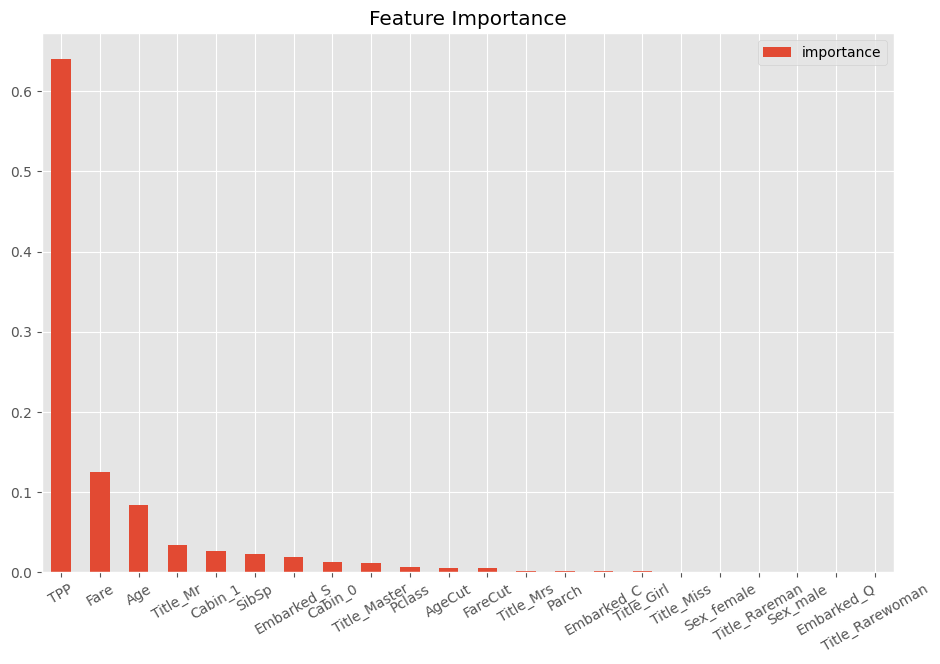

In [214]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

__Based on the bar plot, 'TPP','Fare','Age' are the most important.__

**Now let's think through this problem in another way. Our goal here is to improve the overall accuracy. This is equivalent to minimizing the misclassified observations. So if all the misclassified observations are found, maybe we can see the pattern and generate some new features.**

**Again we use cross-validation to search for the miscalssified observations**

In [215]:
from sklearn.model_selection import KFold

In [216]:
kf=KFold(n_splits=10, shuffle=True, random_state=1) # set shuffle to True to use random_state

In [217]:
kf.get_n_splits(X)

10

In [218]:
print(kf)

KFold(n_splits=10, random_state=1, shuffle=True)


In [219]:
# extract the indices of misclassified observations
rr=[]
for train_index, val_index in kf.split(X):
    # Use .iloc for integer-location based indexing
    pred=model.fit(X.iloc[train_index],y[train_index]).predict(X.iloc[val_index])
    rr.append(y[val_index][pred!=y[val_index]].index.values)

In [220]:
rr

[array([  8,  17,  81, 111, 142, 187, 205, 207, 233, 370, 509, 622, 680,
        724, 729, 772, 821]),
 array([ 23,  49,  85, 106, 107, 267, 414, 415, 452, 498, 554, 643, 649,
        692, 828]),
 array([ 41,  74, 224, 248, 301, 449, 453, 484, 507, 510, 543, 550, 570,
        578, 593, 654, 740, 744, 748, 852]),
 array([ 14,  40,  68, 114, 139, 184, 204, 226, 246, 286, 429, 553, 664,
        677, 690, 816]),
 array([ 39, 146, 186, 261, 396, 434, 447, 455, 483, 501, 502, 587, 604,
        698, 782, 839, 855]),
 array([ 18,  97, 177, 192, 220, 283, 312, 347, 373, 400, 579, 607, 647,
        857]),
 array([ 36, 127, 240, 315, 328, 351, 376, 458, 526, 533, 559, 617, 673,
        711, 786]),
 array([ 21,  55,  79, 100, 137, 199, 251, 271, 391, 444, 536, 547, 804,
        807]),
 array([140, 338, 489, 505, 569, 630, 660, 712, 762, 823]),
 array([ 25, 209, 235, 252, 264, 276, 279, 288, 297, 357, 390, 431, 534,
        621, 645, 707, 767, 838, 854])]

In [221]:
# combine all the indices
whole_index=np.concatenate(rr)
len(whole_index)

157

In [222]:
full.iloc[whole_index].head() # Use .iloc for integer-location based indexing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCut,FareCut,TPP
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,Mrs,2.0,3,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,34.5,0,0,244373,13.0000,0,S,Mr,3.0,3,3.0
81,82,1.0,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,0,S,Mr,2.0,2,3.0
111,112,0.0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,0,C,Miss,1.0,3,2.0
142,143,1.0,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,0,S,Mrs,2.0,3,2.0


In [223]:
diff=full.iloc[whole_index]

In [224]:
diff.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeCut,FareCut,TPP
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,420.821656,0.668790,2.312102,30.939490,0.420382,0.273885,27.152309,2.439490,2.980892,2.573248
std,248.052246,0.472155,0.897672,12.673077,0.734911,0.694405,30.390669,0.795319,1.370342,0.601321
min,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,210.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.925000,2.000000,2.000000,2.000000
50%,432.000000,1.000000,3.000000,30.000000,0.000000,0.000000,14.458300,2.000000,3.000000,3.000000
75%,623.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000,3.000000,4.000000,3.000000
max,858.000000,1.000000,3.000000,80.000000,4.000000,5.000000,151.550000,5.000000,5.000000,3.000000


In [225]:
diff.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title
count,157,157,157,157,157,157
unique,157,2,146,2,3,6
top,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",male,1601,0,S,Mr
freq,1,89,5,112,114,83


In [226]:
# both mean and count of 'survived' should be considered.
diff.groupby(['Title'])['Survived'].agg([('average','mean'),('number','count')])

,average,number
Title,,
Girl,0.375000,8
Master,1.000000,2
Miss,0.363636,33
Mr,0.855422,83
Mrs,0.518519,27
Rareman,0.750000,4


In [227]:
diff.groupby(['Title','Pclass'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass                  
Girl    1       0.000000       1
        3       0.428571       7
Master  3       1.000000       2
Miss    1       0.000000       1
        2       0.500000       4
        3       0.357143      28
Mr      1       0.692308      39
        2       1.000000       8
        3       1.000000      36
Mrs     1       0.000000       1
        2       0.000000       4
        3       0.636364      22
Rareman 1       0.750000       4

**It seems mainly the third class 'Miss'/'Mrs' and the first/third class 'Mr' are missclassified.**

In [228]:
diff.groupby(['Title','Pclass','Parch','SibSp'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass Parch SibSp                  
Girl    1      2     1      0.000000       1
        3      0     0      0.000000       1
                     1      1.000000       1
               1     0      0.000000       1
                     1      0.000000       1
               2     0      0.500000       2
                     4      1.000000       1
Master  3      1     1      1.000000       1
               2     4      1.000000       1
Miss    1      0     0      0.000000       1
        2      0     0      0.500000       4
        3      0     0      0.347826      23
                     1      0.250000       4
               2     4      1.000000       1
Mr      1      0     0      0.650000      20
                     1      0.692308      13
               1     0      1.000000       1
                     1      0.666667       3
               2     0      1.000000       1
                     1      1.000000       1
        2      0     0      1.000000       7
                     1      1.000000       1
        3      0     0      1.000000      32
                     1      1.000000       2
                     2      1.000000       1
               1     1      1.000000       1
Mrs     1      2     1      0.000000       1
        2      0     0      0.000000       1
                     1      0.000000       2
               1     1      0.000000       1
        3      0     0      0.500000       2
                     1      0.500000      10
                     3      1.000000       1
               1     0      1.000000       2
                     1      0.666667       3
               2     0      0.666667       3
               5     1      1.000000       1
Rareman 1      0     0      0.666667       3
                     2      1.000000       1

Gererally, we should only pick the categories with relatively large numbers. That is:

1. **'Mr','Pclass 1','Parch 0','SibSp 0', 17**
2. **'Mr','Pclass 1','Parch 0','SibSp 1', 8**
3. **'Mr','Pclass 2/3','Parch 0','SibSp 0', 32+7**
4. **'Miss','Pclass 3','Parch 0','SibSp 0', 21**

__Then we add new feature 'MPPS'.__

In [229]:
full.loc[(full.Title=='Mr')&(full.Pclass==1)&(full.Parch==0)&((full.SibSp==0)|(full.SibSp==1)),'MPPS']=1
full.loc[(full.Title=='Mr')&(full.Pclass!=1)&(full.Parch==0)&(full.SibSp==0),'MPPS']=2
full.loc[(full.Title=='Miss')&(full.Pclass==3)&(full.Parch==0)&(full.SibSp==0),'MPPS']=3
full.MPPS.fillna(4,inplace=True)

In [230]:
full.MPPS.value_counts()

,count
MPPS,
4.0,606
2.0,485
1.0,132
3.0,86


From the __feature-Importance__ plot we can see the 'Fare' is the most important feature, let's explore whether we can generate some new feature.

In [231]:
diff[(diff.Title=='Mr')|(diff.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                         \
               count                  mean                              std   
Pclass             1    2     3          1          2          3          1   
Title Survived                                                                
Miss  0.0        1.0  2.0  18.0  28.712500  13.000000   8.902550        NaN   
      1.0        NaN  2.0  10.0        NaN  10.500000   8.367090        NaN   
Mr    0.0       12.0  NaN   NaN  61.880550        NaN        NaN  38.069095   
      1.0       27.0  8.0  36.0  52.749696  14.107812  15.391664  28.254144   

                                              ...                        \
                                         min  ...    25%      50%         
Pclass                 2          3        1  ...      3        1     2   
Title Survived                                ...                         
Miss  0.0       0.000000   2.579503  28.7125  ...  7.750  28.7125  13.0   
      1.0       0.000000   1.609362      NaN  ...  7.575      NaN  10.5   
Mr    0.0            NaN        NaN  26.5500  ...    NaN  53.1000   NaN   
      1.0       4.963091  17.133150  26.2875  ...  7.775  52.0000  13.0   

                                                                                
                             75%                            max                 
Pclass               3         1          2         3         1     2        3  
Title Survived                                                                  
Miss  0.0       7.8146  28.71250  13.000000  8.084375   28.7125  13.0  14.4583  
      1.0       7.8146       NaN  10.500000  7.907300       NaN  10.5  12.4750  
Mr    0.0          NaN  86.62500        NaN       NaN  135.6333   NaN      NaN  
      1.0       7.9250  70.04375  13.215625  9.500000  120.0000  26.0  56.4958  

[4 rows x 24 columns]

In [232]:
full[(full.Title=='Mr')|(full.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                 \
               count                     mean                         
Pclass             1     2      3           1          2          3   
Title Survived                                                        
Miss  0.0        1.0   2.0   30.0   28.712500  13.000000  11.637643   
      1.0       43.0  23.0   37.0  126.099126  17.611230   9.216559   
Mr    0.0       70.0  89.0  283.0   65.164104  19.651638  10.779237   
      1.0       37.0   8.0   36.0   73.464646  14.107812  15.391664   

                                                           ...          \
                       std                            min  ...     25%   
Pclass                   1          2          3        1  ...       3   
Title Survived                                             ...           
Miss  0.0              NaN   0.000000   8.512399  28.7125  ...  7.7750   
      1.0        92.270616  12.193091   4.004733  26.2833  ...  7.7500   
Mr    0.0        61.918723  15.857649   9.170363   0.0000  ...  7.7333   
      1.0       109.590302   4.963091  17.133150  26.2875  ...  7.7750   

                                                                       \
                    50%                       75%                       
Pclass                1     2       3           1          2        3   
Title Survived                                                          
Miss  0.0       28.7125  13.0  8.4000   28.712500  13.000000  10.3469   
      1.0       90.0000  13.0  7.7750  152.506250  17.429150   7.9250   
Mr    0.0       48.3021  13.0  7.8958   78.459375  26.000000   8.6625   
      1.0       35.5000  13.0  7.9250   76.729200  13.215625   9.5000   

                                         
                     max                 
Pclass                 1     2        3  
Title Survived                           
Miss  0.0        28.7125  13.0  46.9000  
      1.0       512.3292  65.0  24.1500  
Mr    0.0       263.0000  73.5  69.5500  
      1.0       512.3292  26.0  56.4958  

[4 rows x 24 columns]

But there seems no big difference between the 'Fare' of 'diff' and 'full'.

__Finally we could draw a corrlelation heatmap__

<Axes: title={'center': 'Pearson Correlation of Features'}>

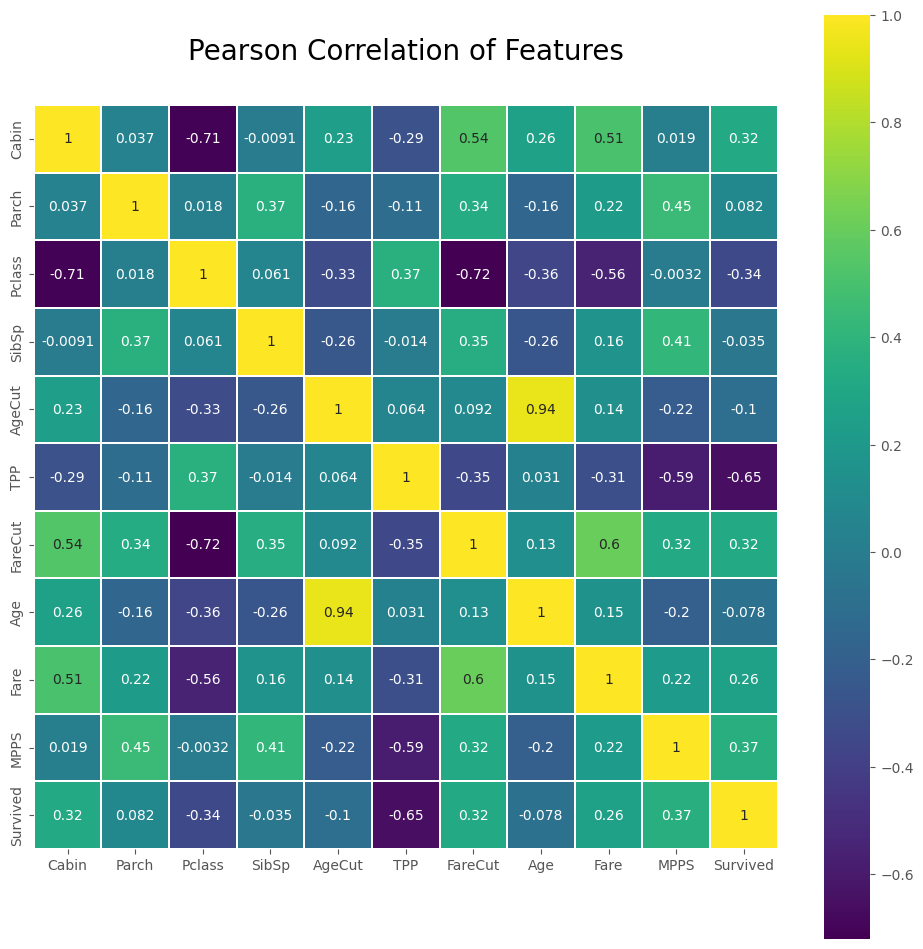

In [233]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(full[['Cabin','Parch','Pclass','SibSp','AgeCut','TPP','FareCut','Age','Fare','MPPS','Survived']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Hyperparameters Tuning

__Now let's do grid search for some algorithms. Since many algorithms performs better in scaled data, we will use scaled data.__

In [234]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare','MPPS']
full_dummies=pd.get_dummies(full[predictors])
X=full_dummies[:891]
y=full.Survived[:891]
test_X=full_dummies[891:]

scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [235]:
from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors

In [236]:
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 8}, 0.8271357730211537)

### Logistic Regression

In [237]:
param_grid={'C':[0.01,0.1,1,10]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 0.1}, 0.831648986253217)

In [238]:
# second round grid search
param_grid={'C':[0.04,0.06,0.08,0.1,0.12,0.14]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 0.14}, 0.832772581758835)

### Support Vector Machine

In [239]:
param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.01}, 0.8316427091833531)

In [240]:
#second round grid search
param_grid={'C':[2,4,6,8,10,12,14],'gamma':[0.008,0.01,0.012,0.015,0.02]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 6, 'gamma': 0.01}, 0.8350134957002071)

### Gradient Boosting Decision Tree

In [241]:
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.05,0.1,0.5,1],'max_depth':[1,2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120},
 0.8462055112673404)

In [242]:
#second round search
param_grid={'n_estimators':[100,120,140,160],'learning_rate':[0.05,0.08,0.1,0.12],'max_depth':[3,4]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
 0.8462494507563869)

# Ensemble Methods

## Bagging

__We use logistic regression with the parameter we just tuned to apply bagging.__

In [243]:
from sklearn.ensemble import BaggingClassifier

In [244]:
bagging=BaggingClassifier(LogisticRegression(C=0.06),n_estimators=100)

## VotingClassifier

__We use five models to apply votingclassifier, namely logistic regression, random forest, gradient boosting decision,support vector machine and k-nearest neighbors.__

In [245]:
from sklearn.ensemble import VotingClassifier

In [246]:
clf1=LogisticRegression(C=0.06)
clf2=RandomForestClassifier(n_estimators=500)
clf3=GradientBoostingClassifier(n_estimators=120,learning_rate=0.12,max_depth=4)
clf4=SVC(C=4,gamma=0.015,probability=True)
clf5=KNeighborsClassifier(n_neighbors=8)

In [247]:
eclf_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)])

In [248]:
# add weights
eclfW_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],weights=[1,1,2,2,1])

In [249]:
# soft voting
eclf_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft')

In [250]:
# add weights
eclfW_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft',weights=[1,1,2,2,1])

__Finally we can evaluate all the models we just used.__

In [251]:
models=[KNeighborsClassifier(n_neighbors=8),LogisticRegression(C=0.06),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=500),
        GradientBoostingClassifier(n_estimators=120,learning_rate=0.12,max_depth=4),SVC(C=4,gamma=0.015),
        eclf_hard,eclf_soft,eclfW_hard,eclfW_soft,bagging]

In [252]:
names=['KNN','LR','NB','CART','RF','GBT','SVM','VC_hard','VC_soft','VCW_hard','VCW_soft','Bagging']
for name,model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}: {},{}".format(name,score.mean(),score))

KNN: 0.8271357730211537,[0.84916201 0.7752809  0.87078652 0.80898876 0.83146067]
LR: 0.828278199736363,[0.83240223 0.81460674 0.81460674 0.81460674 0.86516854]
NB: 0.8013935095097608,[0.75977654 0.79775281 0.81460674 0.7752809  0.85955056]
CART: 0.7833845960705543,[0.7877095  0.75842697 0.82022472 0.76404494 0.78651685]
RF: 0.8002008662356411,[0.82122905 0.75842697 0.84831461 0.74719101 0.8258427 ]
GBT: 0.8439897056054233,[0.84916201 0.8258427  0.85955056 0.81460674 0.87078652]
SVM: 0.8338836231247255,[0.84357542 0.8258427  0.83146067 0.79775281 0.87078652]
VC_hard: 0.8417487916640513,[0.84357542 0.82022472 0.87640449 0.79775281 0.87078652]
VC_soft: 0.8338899001945892,[0.83798883 0.80898876 0.85955056 0.80337079 0.85955056]
VCW_hard: 0.8395078777226791,[0.83798883 0.82022472 0.86516854 0.80337079 0.87078652]
VCW_soft: 0.840631473228297,[0.83798883 0.8258427  0.85955056 0.80337079 0.87640449]
Bagging: 0.824913690289373,[0.82681564 0.81460674 0.80898876 0.81460674 0.85955056]


## Stacking

__We use logistic regression, k-nearest neighbors, support vector machine, Gradient Boosting Decision Tree as first-level models, and use random forest as second-level model.__

In [253]:
from sklearn.model_selection import StratifiedKFold
n_train=train.shape[0]
n_test=test.shape[0]
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [254]:
def get_oof(clf,X,y,test_X):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((5,n_test))
    for i, (train_index,val_index) in enumerate(kf.split(X,y)):
        kf_X_train=X[train_index]
        kf_y_train=y[train_index]
        kf_X_val=X[val_index]

        clf.fit(kf_X_train,kf_y_train)

        oof_train[val_index]=clf.predict(kf_X_val)
        oof_test_single[i,:]=clf.predict(test_X)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

In [255]:
LR_train,LR_test=get_oof(LogisticRegression(C=0.06),X_scaled,y,test_X_scaled)
KNN_train,KNN_test=get_oof(KNeighborsClassifier(n_neighbors=8),X_scaled,y,test_X_scaled)
SVM_train,SVM_test=get_oof(SVC(C=4,gamma=0.015),X_scaled,y,test_X_scaled)
GBDT_train,GBDT_test=get_oof(GradientBoostingClassifier(n_estimators=120,learning_rate=0.12,max_depth=4),X_scaled,y,test_X_scaled)

In [256]:
X_stack=np.concatenate((LR_train,KNN_train,SVM_train,GBDT_train),axis=1)
y_stack=y
X_test_stack=np.concatenate((LR_test,KNN_test,SVM_test,GBDT_test),axis=1)

In [257]:
X_stack.shape,y_stack.shape,X_test_stack.shape

((891, 4), (891,), (418, 4))

In [258]:
stack_score=cross_val_score(RandomForestClassifier(n_estimators=1000),X_stack,y_stack,cv=5)

In [259]:
# cross-validation score of stacking
stack_score.mean(),stack_score

(0.8181658401858012,
 array([0.83240223, 0.79775281, 0.80898876, 0.79775281, 0.85393258]))

In [260]:
pred=RandomForestClassifier(n_estimators=500).fit(X_stack,y_stack).predict(X_test_stack)

In [261]:
submission=pd.DataFrame(
                   {'PassengerId':test.PassengerId,
                         'Survived':pred})

In [262]:
submission.to_csv('gender_submission.csv',index=False)